In [57]:
%matplotlib inline
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
def load_dataset(path: Path) -> pd.DataFrame:
    df = pd.read_json(path)
    df.date = pd.to_datetime(df.date, format="%Y-%m-%d %H:%M:%S")
    df.set_index('date', inplace=True)
    return df


df = load_dataset("../datasets/Hydra-L.json")
df.head()


,BME280_temp,BME280_humidity,BME280_pressure
date,,,
2022-07-06 00:00:04,30.45,34.93,746.19
2022-07-06 00:00:29,30.55,34.55,745.17
2022-07-06 00:00:30,28.27,43.74,746.70
2022-07-06 00:00:32,30.62,35.08,746.40
2022-07-06 00:00:33,27.05,45.82,746.68


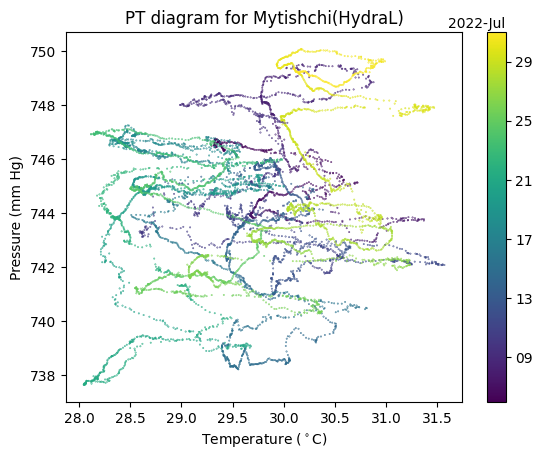

In [83]:
df_mean = df.resample('5min').mean()

# This part approximate PT dependence. Works only for small datasets
# df_mean = df_mean[:200]
# p = np.polynomial.Polynomial.fit(df_mean.BME280_temp, df_mean.BME280_pressure, 2)
# plt.scatter(df_mean.BME280_temp, p(df_mean.BME280_temp), 0.1, c='red')

plt.xlabel(r'Temperature ($^\circ$C)')
plt.ylabel(r'Pressure (mm Hg)')
plt.title(f'PT diagram for Mytishchi(HydraL)')

smap = plt.scatter(df_mean.BME280_temp, df_mean.BME280_pressure, 0.12, c=mdates.date2num(df_mean.index))

cb = plt.colorbar(smap, orientation='vertical')
loc = mdates.AutoDateLocator()
cb.ax.yaxis.set_major_locator(loc)
cb.ax.yaxis.set_major_formatter(mdates.ConciseDateFormatter(loc))

plt.show()
